Carga del Dataset

In [1]:
import pandas as pd

# Cargar el dataset
ruta = "/content/drive/MyDrive/Modelos Lineales/Mineria de Texto/Dataset Endeudamiento Crediticio - Dataset Endeudamiento Crediticio.csv"
data = pd.read_csv(ruta)

# Mostrar las primeras filas
data.head()


,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,766.126.609,45,2,802.982.129,9120.0,13,0,6,0,2.0
1,2,0,957.151.019,40,0,121.876.201,2600.0,4,0,0,0,1.0
2,3,0,65.818.014,38,1,85.113.375,3042.0,2,1,0,0,0.0
3,4,0,233.809.776,30,0,36.049.682,3300.0,5,0,0,0,0.0
4,5,0,9.072.394,49,1,24.925.695,63588.0,7,0,1,0,0.0


In [2]:
# Ver resumen de columnas y tipos de datos
data.info()

# Contar valores nulos
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  object 
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  object 
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 13.7+ MB


,0
ID,0
Default,0
Prct_uso_tc,0
Edad,0
Nro_prestao_retrasados,0
Prct_deuda_vs_ingresos,0
Mto_ingreso_mensual,29731
Nro_prod_financieros_deuda,0
Nro_retraso_60dias,0
Nro_creditos_hipotecarios,0


Limpieza y conversión de variables

In [3]:
# Eliminar los puntos que representan miles y convertir a float
data["Prct_uso_tc"] = data["Prct_uso_tc"].str.replace(".", "").astype(float)
data["Prct_deuda_vs_ingresos"] = data["Prct_deuda_vs_ingresos"].str.replace(".", "").astype(float)

# Escalar para convertir en proporciones
data["Prct_uso_tc"] = data["Prct_uso_tc"] / 1_000_000
data["Prct_deuda_vs_ingresos"] = data["Prct_deuda_vs_ingresos"] / 1_000_000

# Imputar valores nulos con la mediana
data["Mto_ingreso_mensual"].fillna(data["Mto_ingreso_mensual"].median(), inplace=True)
data["Nro_dependiente"].fillna(data["Nro_dependiente"].median(), inplace=True)

# Confirmar que no haya nulos
data.isnull().sum()


<ipython-input-3-bd9e9dfb7e02>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Mto_ingreso_mensual"].fillna(data["Mto_ingreso_mensual"].median(), inplace=True)
<ipython-input-3-bd9e9dfb7e02>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

,0
ID,0
Default,0
Prct_uso_tc,0
Edad,0
Nro_prestao_retrasados,0
Prct_deuda_vs_ingresos,0
Mto_ingreso_mensual,0
Nro_prod_financieros_deuda,0
Nro_retraso_60dias,0
Nro_creditos_hipotecarios,0


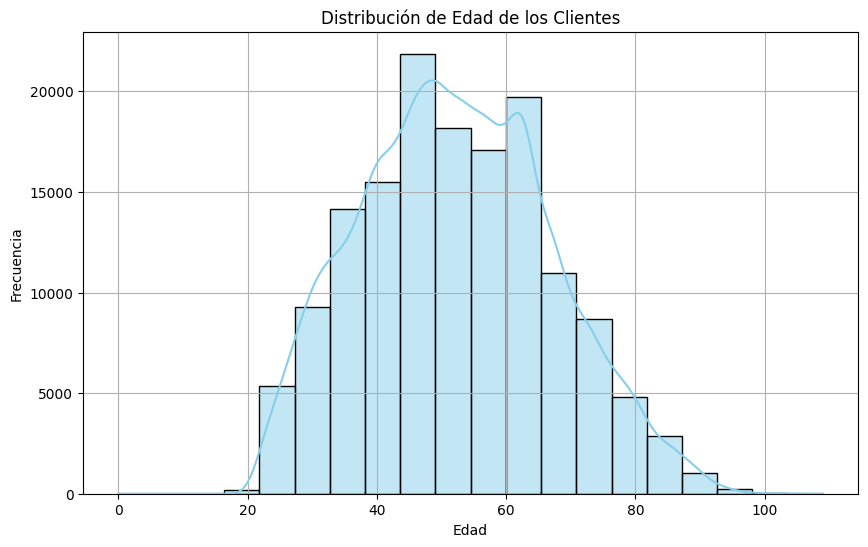

,Edad
count,150000.000000
mean,52.295207
std,14.771866
min,0.000000
25%,41.000000
50%,52.000000
75%,63.000000
max,109.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(data["Edad"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Estadísticas de edad
data["Edad"].describe()


Default
0    93.316
1     6.684
Name: proportion, dtype: float64


<ipython-input-5-c7a2e0418a5e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Default", data=data, palette="Set2")


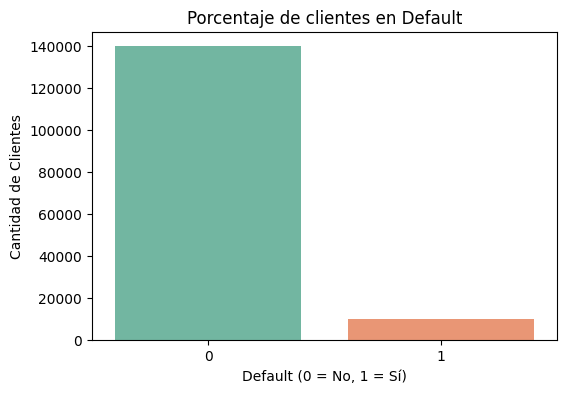

In [5]:
# Porcentaje de default
default_porcentaje = data["Default"].value_counts(normalize=True) * 100
print(default_porcentaje)

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x="Default", data=data, palette="Set2")
plt.title("Porcentaje de clientes en Default")
plt.xlabel("Default (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.show()


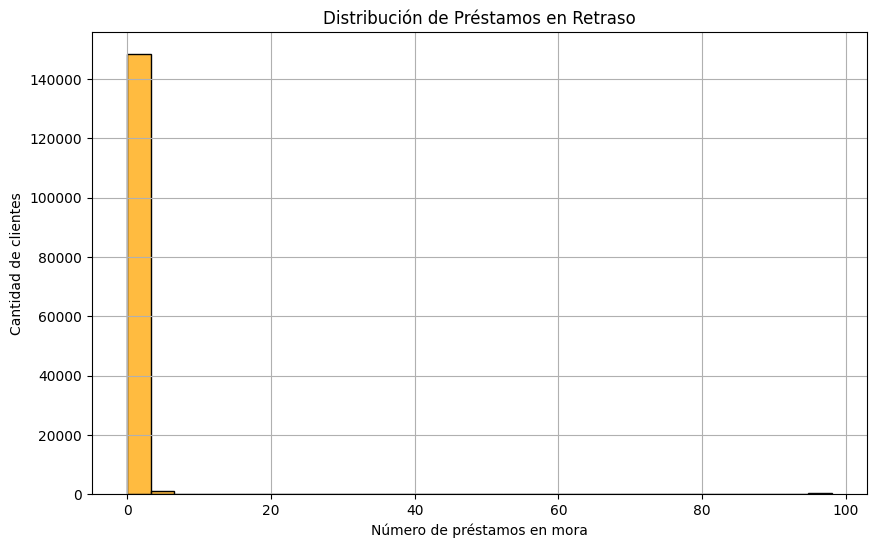

,Nro_prestao_retrasados
count,150000.000000
mean,0.421033
std,4.192781
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,98.000000


In [6]:
# Histograma de préstamos en mora
plt.figure(figsize=(10, 6))
sns.histplot(data["Nro_prestao_retrasados"], bins=30, kde=False, color="orange")
plt.title("Distribución de Préstamos en Retraso")
plt.xlabel("Número de préstamos en mora")
plt.ylabel("Cantidad de clientes")
plt.grid(True)
plt.show()

# Valores extremos
data["Nro_prestao_retrasados"].describe()


Default
0    6477.623137
1    5592.401456
Name: Mto_ingreso_mensual, dtype: float64


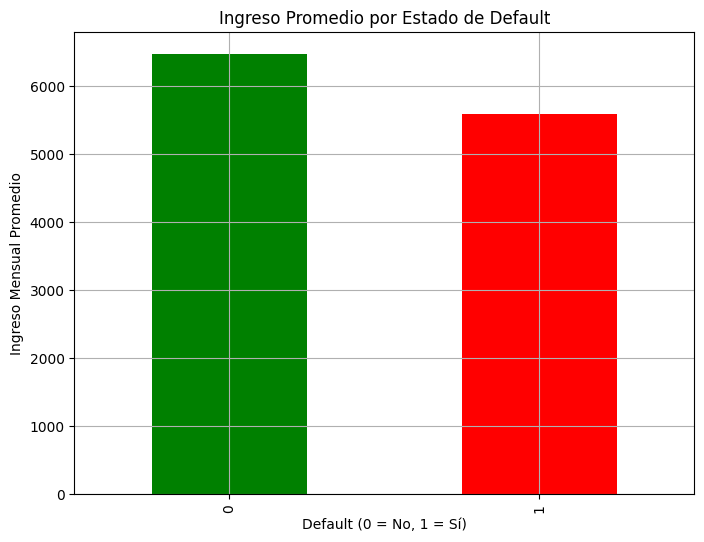

In [7]:
# Ingreso promedio según Default
ingresos_por_default = data.groupby("Default")["Mto_ingreso_mensual"].mean()
print(ingresos_por_default)

# Visualización
ingresos_por_default.plot(kind="bar", color=["green", "red"], figsize=(8, 6))
plt.title("Ingreso Promedio por Estado de Default")
plt.xlabel("Default (0 = No, 1 = Sí)")
plt.ylabel("Ingreso Mensual Promedio")
plt.grid(True)
plt.show()


In [8]:
from scipy.stats import skew

# Seleccionamos variables de interés
variables = ['Edad', 'Mto_ingreso_mensual', 'Prct_uso_tc', 'Prct_deuda_vs_ingresos']

# Calculamos estadísticas
dispersion_df = data[variables].describe().T
dispersion_df['IQR'] = data[variables].quantile(0.75) - data[variables].quantile(0.25)
dispersion_df['Asimetría'] = data[variables].apply(skew)

# Mostramos resumen
dispersion_df[['mean', 'std', 'min', 'max', 'IQR', 'Asimetría']]


,mean,std,min,max,IQR,Asimetría
Edad,52.295207,14.771866,0.0,1.090000e+02,22.000000,0.188993
Mto_ingreso_mensual,6418.454920,12890.395542,0.0,3.008750e+06,3497.000000,127.120424
Prct_uso_tc,230.488315,315.173185,0.0,8.851852e+03,343.014259,2.437326
Prct_deuda_vs_ingresos,265.887465,417.869993,0.0,9.906298e+03,382.597738,7.101164


In [9]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definir variable dependiente
y = data["Prct_deuda_vs_ingresos"]

# Definir variables independientes
X = data[["Nro_dependiente", "Mto_ingreso_mensual", "Edad"]]

# Agregar constante para intercepto (requerido por statsmodels)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Prct_deuda_vs_ingresos   R-squared:                       0.014
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     698.4
Date:                    Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                            01:00:55   Log-Likelihood:            -1.1171e+06
No. Observations:                  150000   AIC:                         2.234e+06
Df Residuals:                      149996   BIC:                         2.234e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 312.4897      4.254     73.457      0.000     304.152     320.828
Nro_dependiente        35.4496      0.994     35.665      0.000      33.501      37.398
Mto_ingreso_mensual    -0.0014   8.34e-05    -16.260      0.000      -0.002      -0.001
Edad                   -1.2246      0.074    -16.470      0.000      -1.370      -1.079
==============================================================================
Omnibus:                   196018.614   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         61735496.466
Skew:                           7.217   Prob(JB):                         0.00
Kurtosis:                     101.333   Cond. No.                     5.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

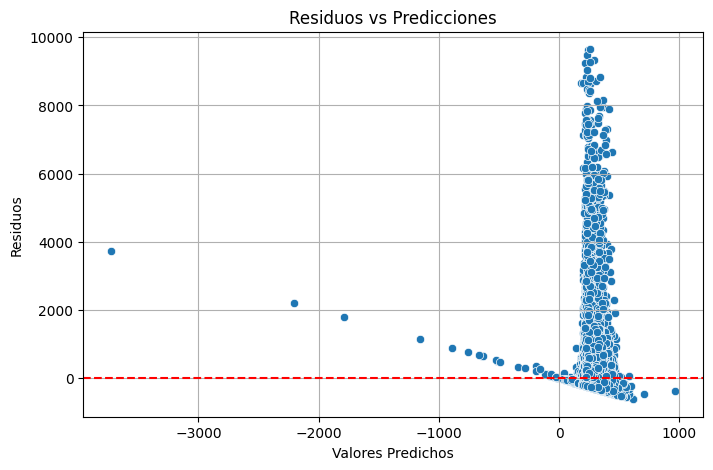

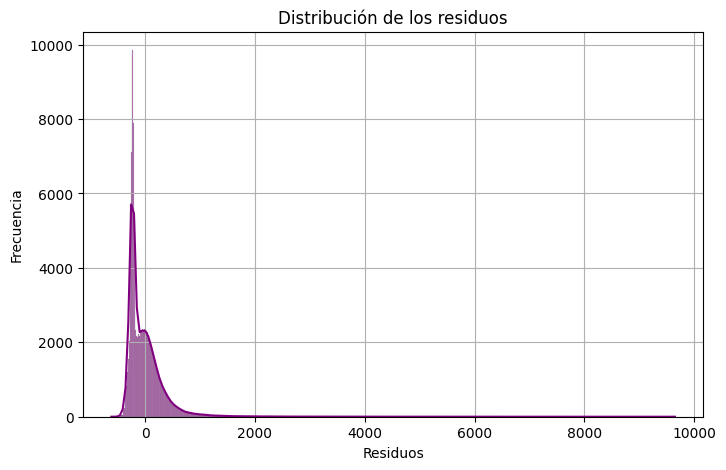

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtener residuos y predicciones
residuos = modelo.resid
predicciones = modelo.fittedvalues

# Gráfico: residuos vs predicciones
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predicciones, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Histograma de residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error

# Error Cuadrático Medio (MSE) y raíz cuadrada (RMSE)
mse = mean_squared_error(y, predicciones)
rmse = np.sqrt(mse)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")


Error Cuadrático Medio (MSE): 172208.7261
Raíz del Error Cuadrático Medio (RMSE): 414.9804


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables predictoras y objetivo
X = data[["Edad", "Mto_ingreso_mensual", "Nro_dependiente", "Prct_uso_tc", "Nro_prestao_retrasados", "Prct_deuda_vs_ingresos"]]
y = data["Default"]

# Estandarización de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Entrenar modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]


[[27762   233]
 [ 1798   207]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27995
           1       0.47      0.10      0.17      2005

    accuracy                           0.93     30000
   macro avg       0.70      0.55      0.57     30000
weighted avg       0.91      0.93      0.91     30000

AUC ROC: 0.7909


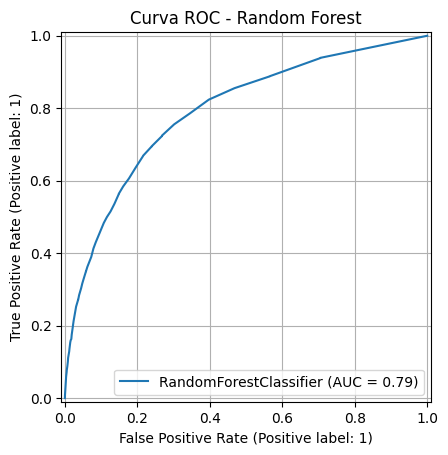

In [14]:
# Matriz de confusión y reporte
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC AUC
roc_score = roc_auc_score(y_test, y_proba)
print(f"AUC ROC: {roc_score:.4f}")

# Curva ROC
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.grid(True)
plt.show()


[[27766   229]
 [ 1822   183]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27995
           1       0.44      0.09      0.15      2005

    accuracy                           0.93     30000
   macro avg       0.69      0.54      0.56     30000
weighted avg       0.91      0.93      0.91     30000

AUC ROC: 0.7825


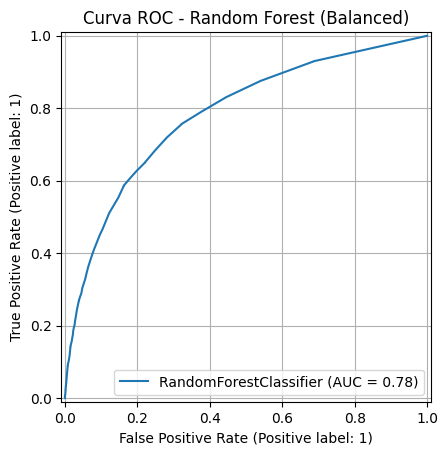

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Entrenamiento con pesos automáticos
clf_bal = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_bal.fit(X_train, y_train)

# Predicciones
y_pred_bal = clf_bal.predict(X_test)
y_proba_bal = clf_bal.predict_proba(X_test)[:, 1]

# Evaluación
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

# Curva ROC
roc_score_bal = roc_auc_score(y_test, y_proba_bal)
print(f"AUC ROC: {roc_score_bal:.4f}")

RocCurveDisplay.from_estimator(clf_bal, X_test, y_test)
plt.title("Curva ROC - Random Forest (Balanced)")
plt.grid(True)
plt.show()


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Variables predictoras y objetivo
X = data[["Edad", "Mto_ingreso_mensual", "Nro_dependiente", "Prct_uso_tc", "Nro_prestao_retrasados", "Prct_deuda_vs_ingresos"]]
y = data["Default"]

# División sin escalar (XGBoost no lo necesita)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"Antes del SMOTE: {y_train.value_counts().to_dict()}")
print(f"Después del SMOTE: {pd.Series(y_train_sm).value_counts().to_dict()}")


Antes del SMOTE: {0: 111979, 1: 8021}
Después del SMOTE: {0: 111979, 1: 111979}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[10372 17623]
 [  241  1764]]
              precision    recall  f1-score   support

           0       0.98      0.37      0.54     27995
           1       0.09      0.88      0.16      2005

    accuracy                           0.40     30000
   macro avg       0.53      0.63      0.35     30000
weighted avg       0.92      0.40      0.51     30000

AUC ROC: 0.7597


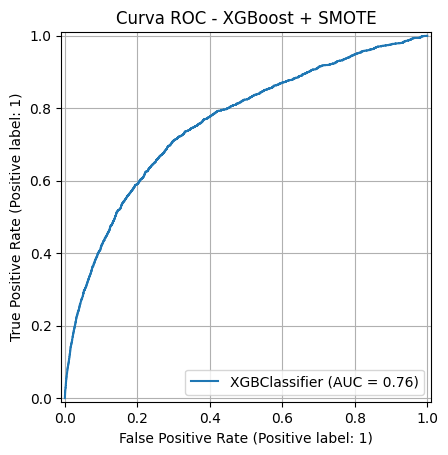

In [17]:
# Calcular proporción de clases original
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Entrenar XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_sm, y_train_sm)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluación
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f"AUC ROC: {roc_auc_score(y_test, y_proba_xgb):.4f}")

# Curva ROC
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("Curva ROC - XGBoost + SMOTE")
plt.grid(True)
plt.show()
